In [1]:
# Connect to drive to obtain de data

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
#We first import the basic libraries that we will use

import numpy as np # linear algebra
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns
import os

In [6]:
#load the data set
df = pd.read_excel('/content/drive/My Drive/EHR/data.xlsx', sheet_name="full")


# Nueva sección

In [7]:
#plot of the head
df.head()

,Unnamed: 0,SUBJECT_ID,GENDER,AGE,HADM_ID,ICD9_CODE,SEQ_NUM,LONG_TITLE,SHORT_TITLE,% Hemoglobin A1c,...,Arterial Blood Pressure mean,Arterial Blood Pressure systolic,Heart Rate,Non Invasive Blood Pressure diastolic,Non Invasive Blood Pressure mean,Non Invasive Blood Pressure systolic,Respiratory Rate,Temperature Celsius,SEPSIS,ICUSTAY_ID
0,0,62919,M,59,107820,99592,9,Severe sepsis,Severe sepsis,NaN,...,74.221374,109.346154,87.215434,60.722488,71.866029,110.497608,27.405063,NaN,1,NaN
1,1,71377,F,71,156655,99592,9,Severe sepsis,Severe sepsis,NaN,...,73.000000,106.000000,93.189474,62.249612,75.750769,118.768992,24.418429,NaN,1,NaN
2,2,95280,F,85,155715,99592,6,Severe sepsis,Severe sepsis,NaN,...,NaN,NaN,84.419525,53.201102,71.513812,129.928375,24.871560,NaN,1,NaN
3,3,94452,F,80,126300,99591,5,Sepsis,Sepsis,NaN,...,NaN,NaN,87.250000,65.761905,79.857143,123.476190,15.666667,NaN,1,NaN
4,4,93567,M,87,166184,41402,1,Coronary atherosclerosis of autologous vein by...,Crn ath atlg vn bps grft,NaN,...,107.727273,188.909091,71.903955,73.006329,84.810127,124.658228,18.636364,NaN,0,253004.0


In [8]:
#shape of the data set
df.shape

(4420, 68)

In [9]:
df.isnull().sum()

Unnamed: 0                                 0
SUBJECT_ID                                 0
GENDER                                     0
AGE                                        0
HADM_ID                                    0
                                        ... 
Non Invasive Blood Pressure systolic      45
Respiratory Rate                           7
Temperature Celsius                     3928
SEPSIS                                     0
ICUSTAY_ID                              2063
Length: 68, dtype: int64

In [10]:
#Count of diferent rows
df["SEPSIS"].value_counts()


0    2357
1    2063
Name: SEPSIS, dtype: int64

In [11]:
#Elimination of unnecessary columns
dataset = df.drop(['SUBJECT_ID', 'HADM_ID', 'ICUSTAY_ID', 'ICD9_CODE',
                             'SEQ_NUM', 'LONG_TITLE', 'SHORT_TITLE'],
                             axis = 'columns')

In [12]:
dataset.columns

Index(['Unnamed: 0', 'GENDER', 'AGE', '% Hemoglobin A1c', '24 hr Creatinine',
       'Albumin/Creatinine, Urine', 'Amylase/Creatinine Ratio, Urine',
       'Anion Gap', 'Bicarbonate', 'Bicarbonate, Ascites',
       'Bicarbonate, Urine', 'Bilirubin, Direct', 'Bilirubin, Indirect',
       'Bilirubin, Total', 'Bilirubin, Total, Ascites',
       'Calculated Bicarbonate, Whole Blood', 'Carboxyhemoglobin', 'Chloride',
       'Chloride, Ascites', 'Chloride, Urine', 'Chloride, Whole Blood',
       'Creatinine', 'Creatinine Clearance', 'Creatinine, Ascites',
       'Creatinine, Urine', 'Fetal Hemoglobin', 'Glucose', 'Glucose, Ascites',
       'Glucose, Urine', 'Hematocrit', 'Hematocrit, Calculated', 'Hemoglobin',
       'Hemoglobin A2', 'Hemoglobin C', 'Hemoglobin F', 'INR(PT)', 'Lactate',
       'Methemoglobin', 'PT', 'PTT', 'Platelet Count', 'Potassium',
       'Potassium, Ascites', 'Potassium, Urine', 'Potassium, Whole Blood',
       'Protein/Creatinine Ratio', 'Urine Volume', 'Urine Volume,

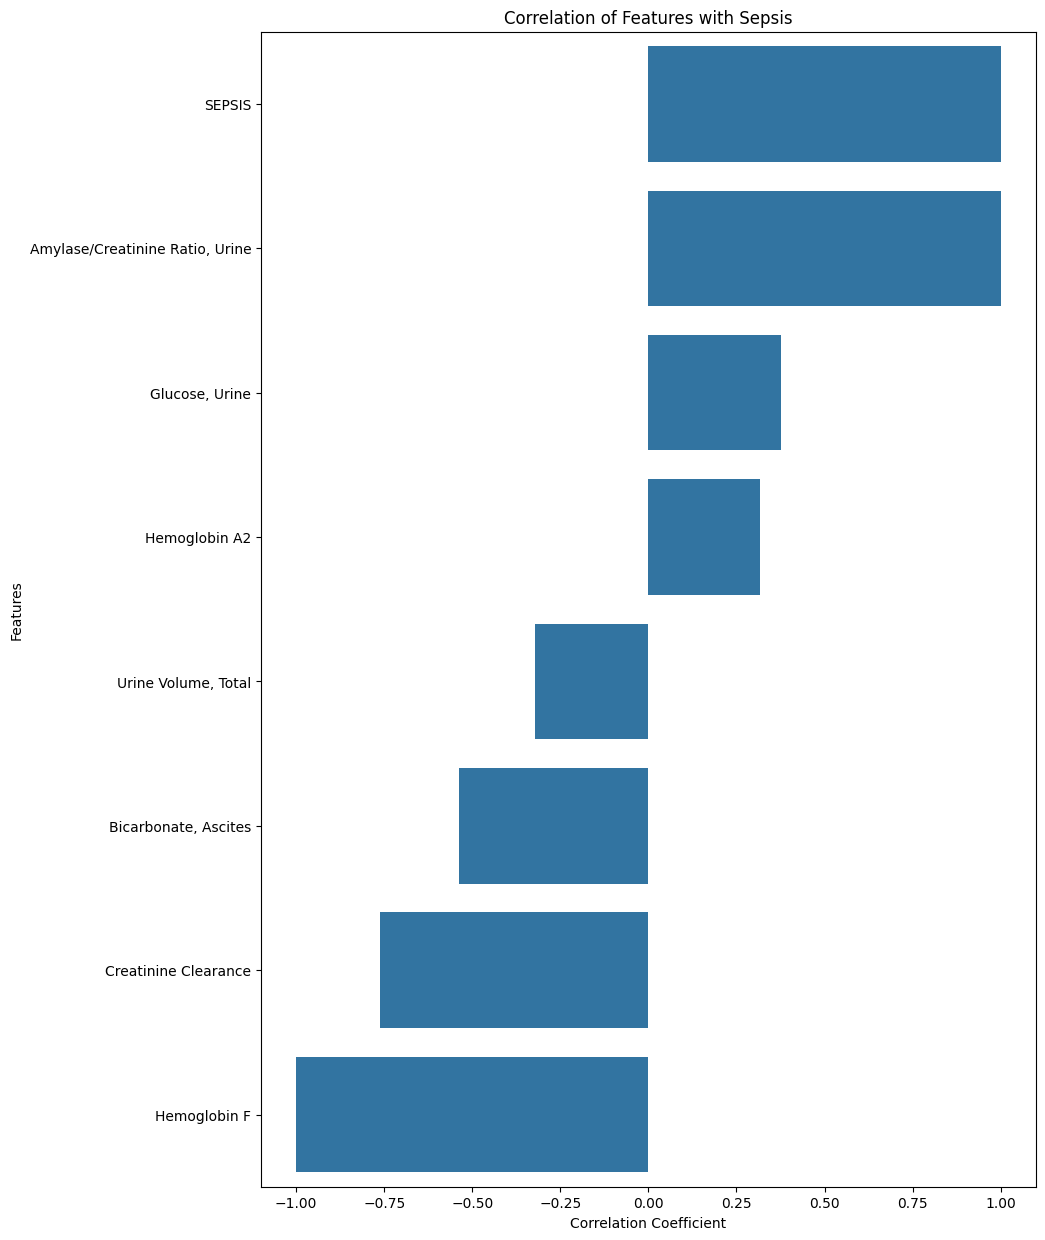

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named 'dataset'
# Calculate correlations with the target variable
correlations = dataset.corrwith(dataset['SEPSIS'])

# Filter correlations that are either greater than 0.6 or less than -0.6
filtered_correlations = correlations[(correlations > 0.3) | (correlations < -0.3)].sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 15))
sns.barplot(x=filtered_correlations, y=filtered_correlations.index)
plt.title('Correlation of Features with Sepsis')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.show()


In [14]:
dataset.columns

Index(['Unnamed: 0', 'GENDER', 'AGE', '% Hemoglobin A1c', '24 hr Creatinine',
       'Albumin/Creatinine, Urine', 'Amylase/Creatinine Ratio, Urine',
       'Anion Gap', 'Bicarbonate', 'Bicarbonate, Ascites',
       'Bicarbonate, Urine', 'Bilirubin, Direct', 'Bilirubin, Indirect',
       'Bilirubin, Total', 'Bilirubin, Total, Ascites',
       'Calculated Bicarbonate, Whole Blood', 'Carboxyhemoglobin', 'Chloride',
       'Chloride, Ascites', 'Chloride, Urine', 'Chloride, Whole Blood',
       'Creatinine', 'Creatinine Clearance', 'Creatinine, Ascites',
       'Creatinine, Urine', 'Fetal Hemoglobin', 'Glucose', 'Glucose, Ascites',
       'Glucose, Urine', 'Hematocrit', 'Hematocrit, Calculated', 'Hemoglobin',
       'Hemoglobin A2', 'Hemoglobin C', 'Hemoglobin F', 'INR(PT)', 'Lactate',
       'Methemoglobin', 'PT', 'PTT', 'Platelet Count', 'Potassium',
       'Potassium, Ascites', 'Potassium, Urine', 'Potassium, Whole Blood',
       'Protein/Creatinine Ratio', 'Urine Volume', 'Urine Volume,

In [15]:
df['pCO2'].value_counts()

42.000000    61
40.000000    60
37.000000    58
36.000000    56
34.000000    55
             ..
39.705882     1
79.400000     1
43.600000     1
63.206452     1
32.400000     1
Name: pCO2, Length: 1285, dtype: int64

In [16]:
numeric_var = ["AGE", "Heart Rate", "Respiratory Rate", "Arterial Blood Pressure mean", "Temperature Celsius", "WBC Count", "Creatinine", "Bilirubin, Total", "Glucose", "Lactate","pCO2"]
categoric_var = ["GENDER", "SEPSIS"]

In [17]:
numeric_axis_name = ["Age of the Patient", "Heart Rate", "Respiratory rate", "Arterial Blood Pressure mean", "Temperature in Celsius", "White Blood cell count", "Creatinine", "Bilirubin", "Glucose", "Lactate", "pCO2"]
list(zip(numeric_var, numeric_axis_name)) #Now both lists appear linked in order


[('AGE', 'Age of the Patient'),
 ('Heart Rate', 'Heart Rate'),
 ('Respiratory Rate', 'Respiratory rate'),
 ('Arterial Blood Pressure mean', 'Arterial Blood Pressure mean'),
 ('Temperature Celsius', 'Temperature in Celsius'),
 ('WBC Count', 'White Blood cell count'),
 ('Creatinine', 'Creatinine'),
 ('Bilirubin, Total', 'Bilirubin'),
 ('Glucose', 'Glucose'),
 ('Lactate', 'Lactate'),
 ('pCO2', 'pCO2')]

In [18]:
categoric_axis_name = ["Gender", "Sepsis"]



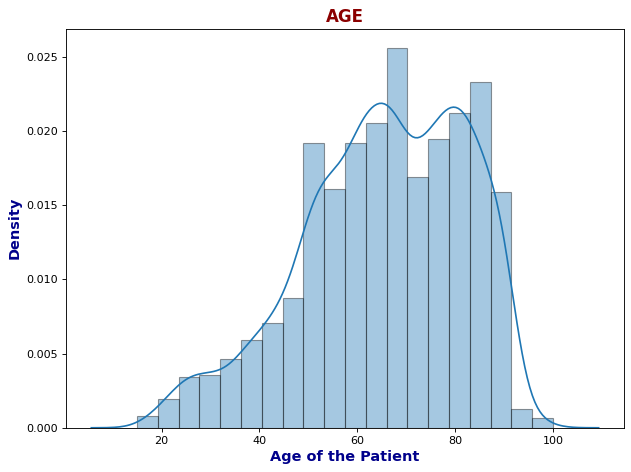

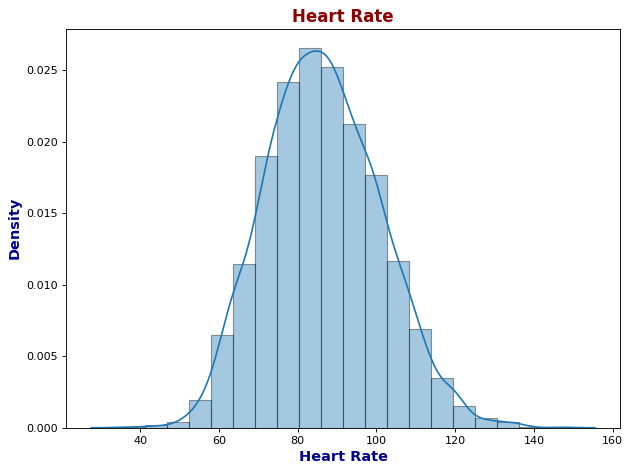

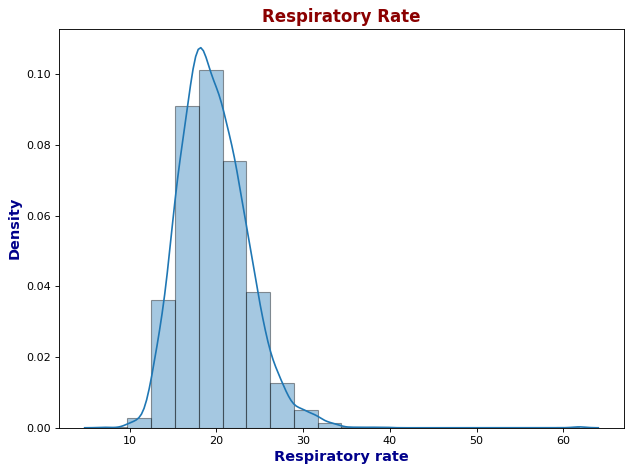

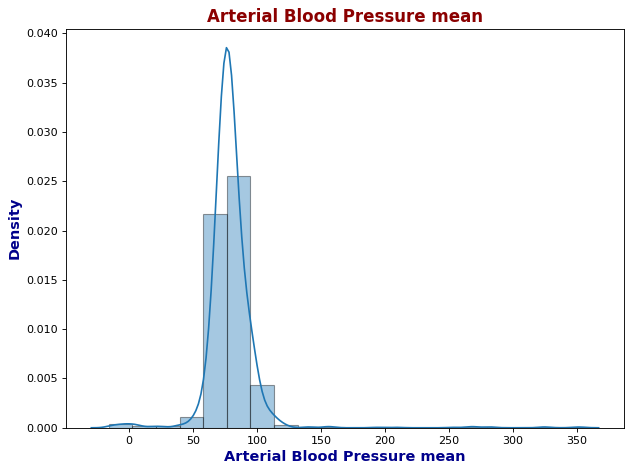

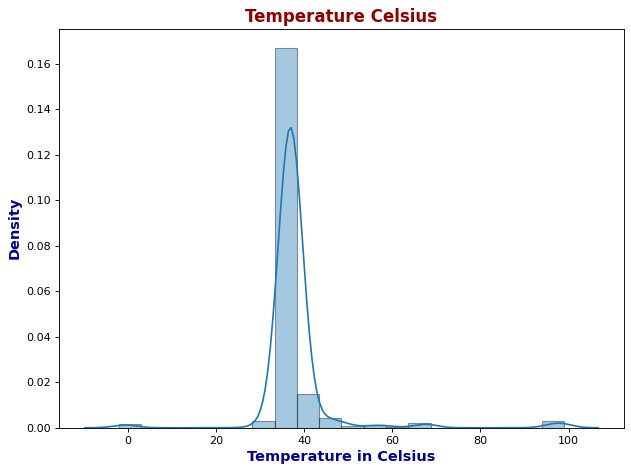

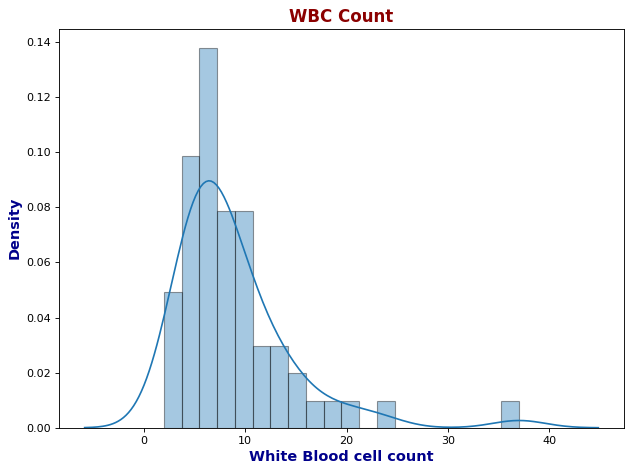

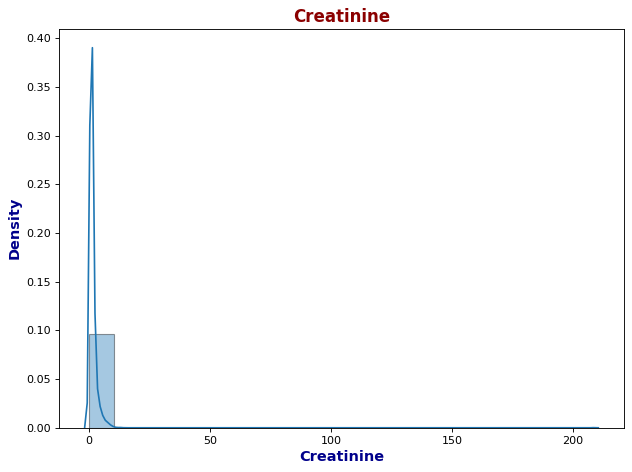

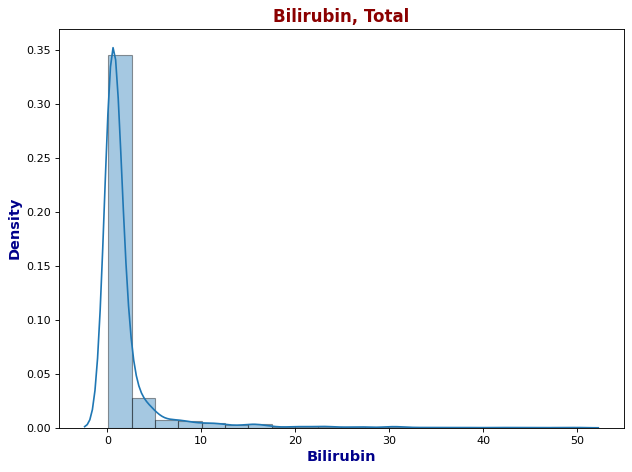

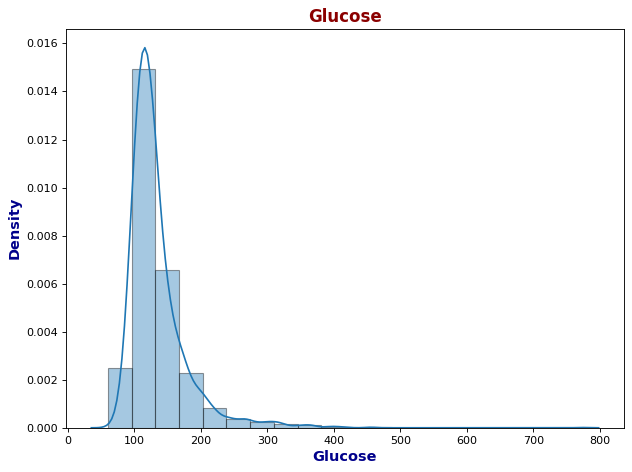

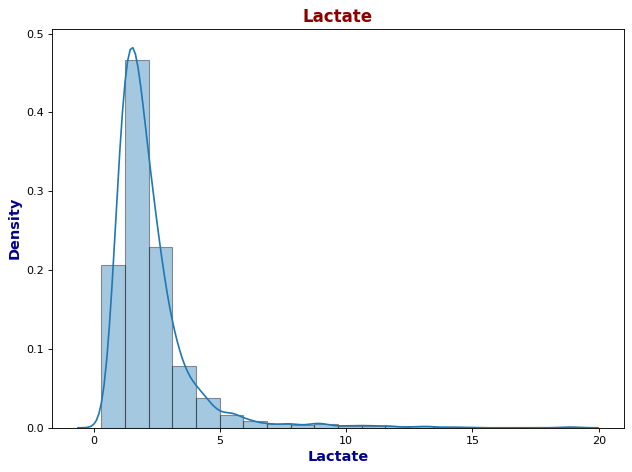

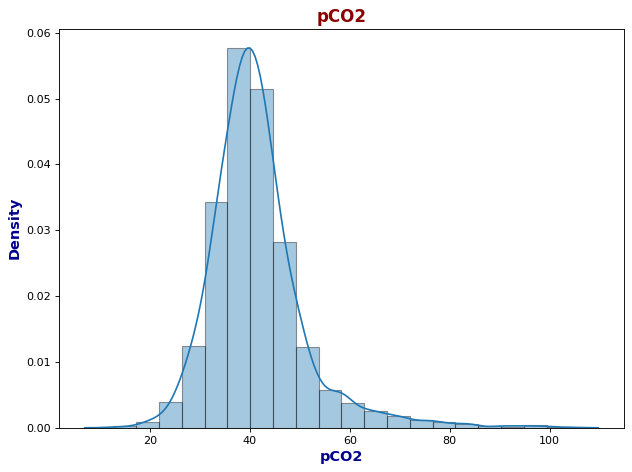

In [19]:
#Analysis with distplot:

title_font = { "color" : "darkred", "weight" : "bold", "size" : 15}
axis_font = { "color" : "darkblue", "weight" : "bold", "size" : 13}

for i, z in list(zip(numeric_var, numeric_axis_name)):
    plt.figure(figsize = (8, 6), dpi = 80)
    sns.distplot(df[i], hist_kws = dict(linewidth = 1, edgecolor = "k"), bins = 20)

    plt.title(i, fontdict = title_font)
    plt.xlabel(z, fontdict = axis_font)
    plt.ylabel("Density", fontdict = axis_font)

    plt.tight_layout()
    plt.show()

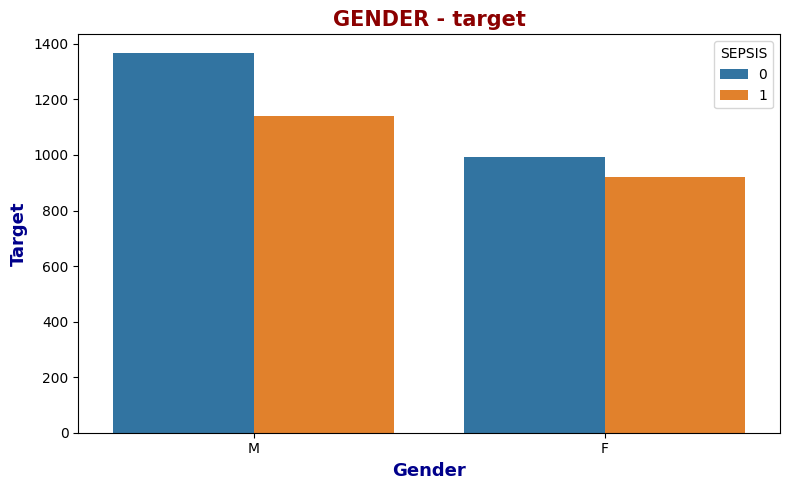

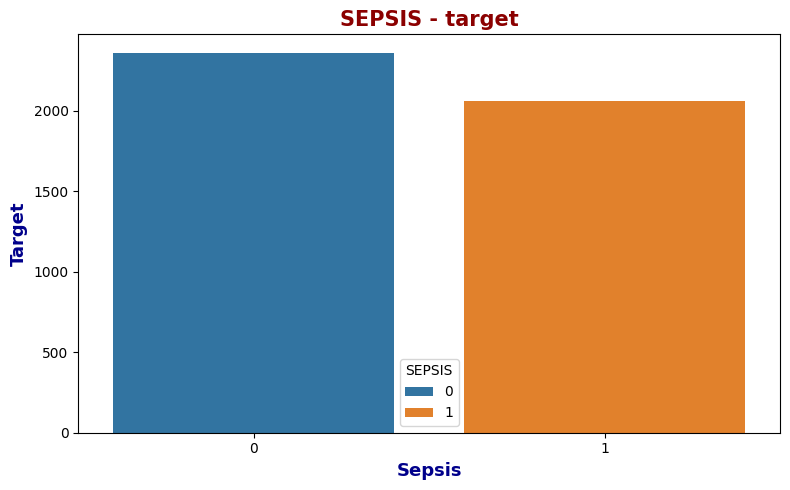

In [20]:
#We will do the analysis with the countplot

title_font = {"color" : "darkred", "weight" : "bold", "size" : 15}
axis_font = {"color" : "darkblue", "weight" : "bold", "size" : 13}

for i, z in list(zip(categoric_var, categoric_axis_name)):
    plt.figure(figsize=(8, 5))
    sns.countplot(x=i, data=df, hue="SEPSIS")

    plt.title(i + " - target", fontdict=title_font)
    plt.xlabel(z, fontdict=axis_font)
    plt.ylabel("Target", fontdict=axis_font)

    plt.tight_layout()
    plt.show()

In [21]:
numeric_var.append("SEPSIS")
numeric_var

['AGE',
 'Heart Rate',
 'Respiratory Rate',
 'Arterial Blood Pressure mean',
 'Temperature Celsius',
 'WBC Count',
 'Creatinine',
 'Bilirubin, Total',
 'Glucose',
 'Lactate',
 'pCO2',
 'SEPSIS']

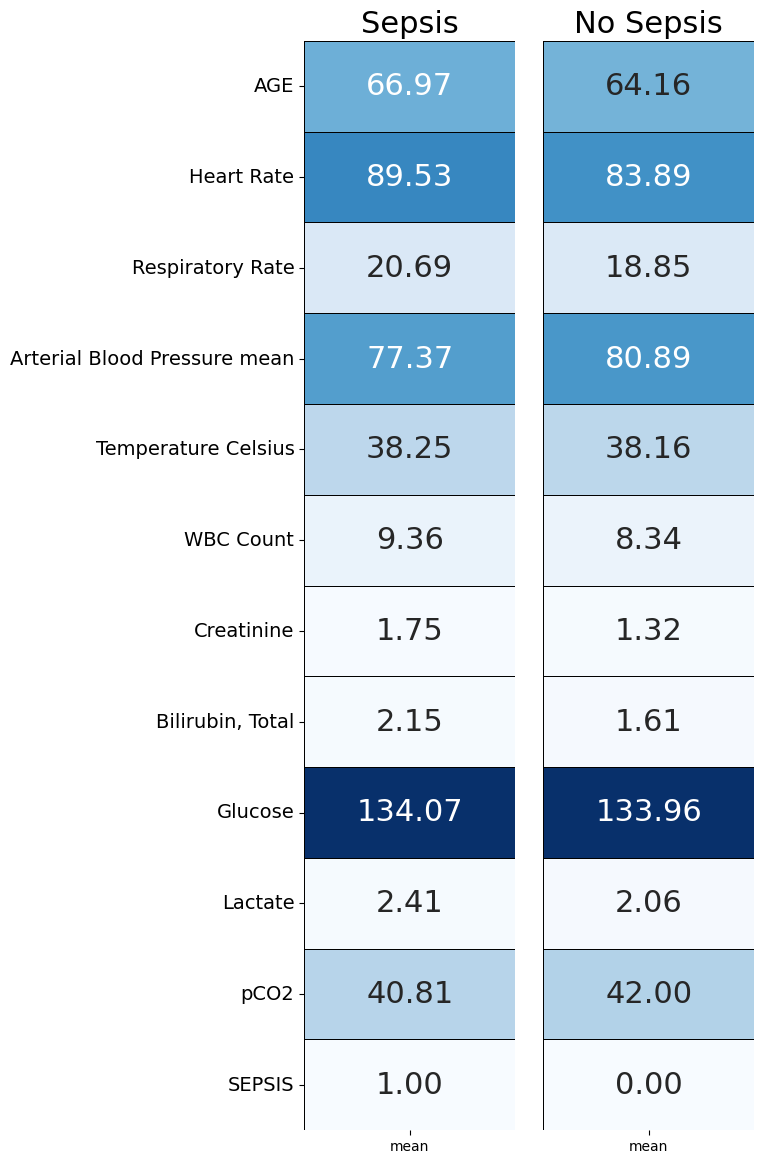

In [22]:
filtered_dataset = dataset[numeric_var]

import matplotlib.pyplot as plt
import seaborn as sns

# Split the dataset into two based on the 'SEPSIS' column
yes = filtered_dataset[filtered_dataset['SEPSIS'] == 1].describe().T
no = filtered_dataset[filtered_dataset['SEPSIS'] == 0].describe().T

# Create subplots
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, len(numeric_var)))

# Font size configuration for numbers and row title
font_size = 12

# Heatmap for patients with Sepsis
plt.subplot(1, 2, 1)
sns.heatmap(yes[['mean']], annot=True, cmap='Blues', linewidths=0.4, linecolor='black', cbar=False, fmt='.2f', annot_kws={"size": font_size+10})
plt.yticks(fontsize=14)
plt.title('Sepsis', fontsize=font_size + 10)

# Heatmap for patients without Sepsis
plt.subplot(1, 2, 2)
sns.heatmap(no[['mean']], annot=True, cmap='Blues', linewidths=0.4, linecolor='black', cbar=False, fmt='.2f', yticklabels=False, annot_kws={"size": font_size+10})
plt.title('No Sepsis', fontsize=font_size + 10)

# Adjust layout
fig.tight_layout(pad=2, w_pad=2)

# Display the plot
plt.show()

In [ ]:
numeric_var = ["AGE", "Heart Rate", "Respiratory Rate", "Arterial Blood Pressure mean", "Temperature Celsius", "WBC Count", "Creatinine", "Bilirubin, Total", "Glucose", "Lactate","pCO2"]
categoric_var = ["GENDER", "SEPSIS"]

In [ ]:
dataset[numeric_var].describe().T


,count,mean,std,min,25%,50%,75%,max
AGE,4420.0,65.471267,16.712993,15.000000,54.000000,67.000000,79.000000,100.000000
Heart Rate,4414.0,86.526021,14.535802,35.739130,76.251953,85.866900,96.355535,147.380952
Respiratory Rate,4413.0,19.704616,3.908950,7.000000,17.000000,19.310345,22.070175,61.849315
Arterial Blood Pressure mean,2174.0,79.261471,21.059357,-16.000000,71.981308,77.650411,84.672195,353.666667
Temperature Celsius,492.0,38.197893,8.910640,-2.000000,36.449823,36.894444,37.535714,99.000000
WBC Count,58.0,8.870402,5.870440,2.000000,5.275000,7.250000,10.587500,37.000000
Creatinine,4418.0,1.522348,3.392895,0.100000,0.763636,1.016667,1.600000,208.550000
"Bilirubin, Total",3438.0,1.904282,4.290460,0.100000,0.400000,0.650000,1.385625,49.754545
Glucose,4419.0,134.015806,44.489027,60.000000,108.000000,122.833333,145.275862,773.333333
Lactate,3765.0,2.242519,1.595794,0.300000,1.350000,1.837500,2.587500,19.050000


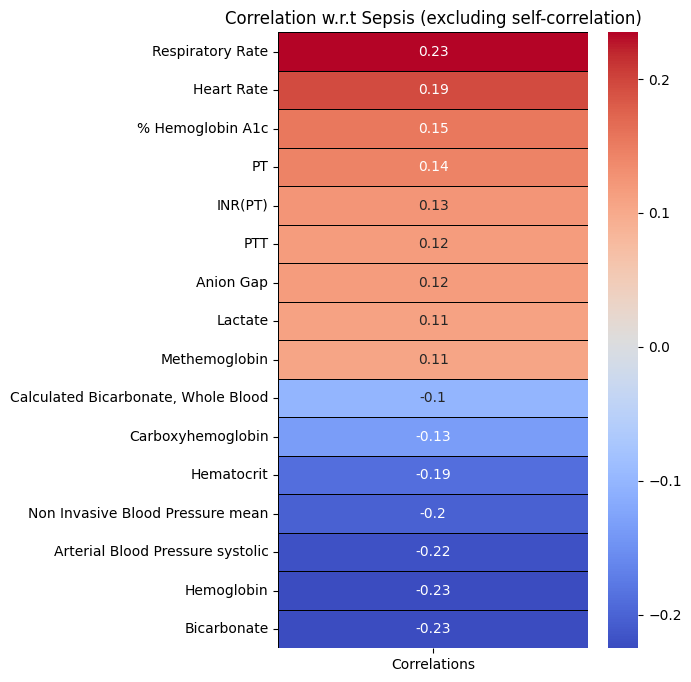

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter columns with at least 100 non-null values (ajusta según sea necesario)
valid_columns = dataset.columns[dataset.count() >= 100]
filtered_dataset = dataset[valid_columns]

# Exclude 'SEPSIS' column from the correlation calculation
filtered_corr = filtered_dataset.drop(columns=['SEPSIS']).corrwith(filtered_dataset['SEPSIS']).sort_values(ascending=False).to_frame()
filtered_corr.columns = ['Correlations']

# Filter correlations to keep only those with an absolute value greater than 0.1
filtered_corr = filtered_corr[(filtered_corr['Correlations'].abs() > 0.1)]

# Determine the number of variables after filtering
num_vars = len(filtered_corr)

# Create the heatmap
plt.subplots(figsize=(5, 0.5 * num_vars))  # Adjust the height based on the number of variables
sns.heatmap(filtered_corr, annot=True, cmap='coolwarm', linewidths=0.4, linecolor='black')
plt.title('Correlation w.r.t Sepsis (excluding self-correlation)')

# Display the plot
plt.show()

